# 1. Speech feature extraction

In out previous exercise, we have tried to extract the speech features including MFCC, short-time energy, fundamental frequency, and voiced speech / unvoiced speech ratio. Here let us try something different: the zero-crossing rate and spectrogram.



## 1.1 Estimate zero-crossing rate
For details about the zero-crossing rate, please see the **lecture note 4, page 27**. 

Procedures:

1. Load the speech_sample from 'lab2_data.mat' using scipy.io.loadmat()
2. Downsample the speech_sample to the target frequency of 11025 Hz (the source frquency is 48000) using scipy.signal.resample()
3. Define the **window size** and **window step**. Usually the window step could be **half or quarter of the window size**.
4. Pad the speech sample to make sure the speech sample is divisible by the moving windows. The value of padding could be zero.
5. Calculate the zero-crossing count (zcc) for each window while the window is moving with the defined step. The zcc is calculated according to the lecture note 4, page 27. 
6. Visulize the zcc contour.

[-0.01370239 -0.01443481 -0.01483154 ...  0.          0.
  0.        ]
Speech Resampled length: 27761
512
128.0
128.0
384.0
[-0.00791785 -0.01628992 -0.01528025 ...  0.          0.
  0.        ]


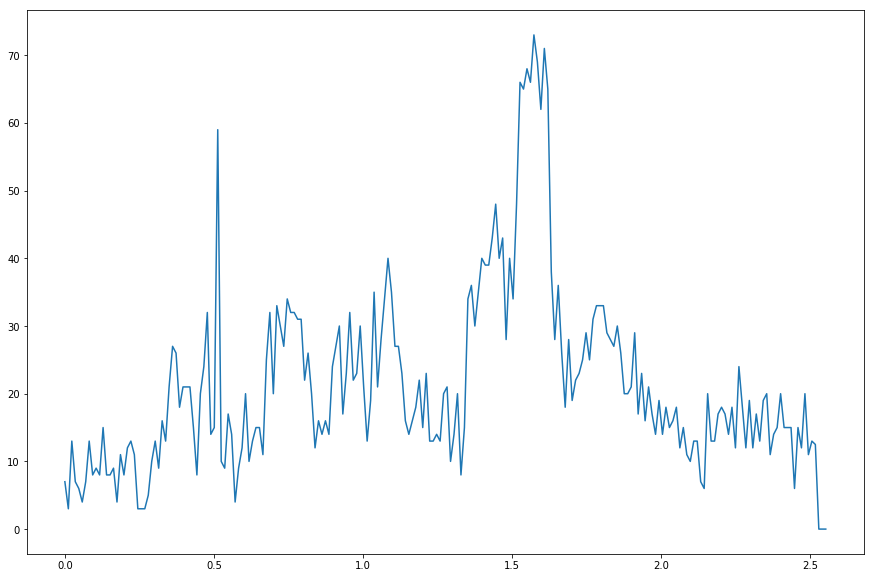

In [4]:
import numpy as np
import scipy.io as sio
from scipy import signal
import matplotlib.pyplot as plt


# Load speech sample
exerciseData = sio.loadmat('lab2_data.mat')
speech_raw = exerciseData['speech_sample'].reshape(-1)

print (speech_raw)

# Downsample the speech sample
fs_source = 48000
fs_down = 11025
speech_resampled = signal.resample(speech_raw, np.round(len(speech_raw) * fs_down / fs_source).astype('int'))

print('Speech Resampled length:', len(speech_resampled))

# Define the zcc window size and step
# Didn't consider rectangular or hamming window
window_size_zcc = 512
window_step_zcc = window_size_zcc/4
print(window_size_zcc)
print(window_step_zcc)

# Calculate the sample length
sample_num = window_step_zcc
print (sample_num)

# Calculate the padding length
padding_length = window_size_zcc - sample_num % window_size_zcc
print (padding_length)


# Define the padding, and padding values are zeros
padding = np.zeros(int(padding_length))

# Pad the speech data
sample_padded = np.concatenate((speech_resampled, padding))
print(sample_padded)

# Caclulate the number of windows according the the window size and step
window_num_zcc = int(np.ceil(len(sample_padded)/window_step_zcc))
#print(window_num_zcc)
#print(len(sample_padded))


# Preallocate memory to the store the outputed zero crossing count, 
# which will be a vector whose length is the number of frames
zcc = np.zeros(window_num_zcc)


# Iteratively calculate the zcc frame by frame, and fill the corresponding position of preallocated vector by the calculate zcc value.
for i in range(window_num_zcc):
    
    # get the the sample of current window 
    start = i * window_step_zcc
    # calculate the zero-crossing count
    stop  = np.min([(start + window_step_zcc - 1), len(sample_padded)])
      
    # filling the zcc into the corresponding position of the zcc vector
    #zcc[i]=  0.5 * np.mean(np.abs(np.diff(np.sign(sample_padded[start:stop]))))
    zcc[i]=  0.5 * np.sum(np.abs(np.diff(np.sign(sample_padded[int(start):int(stop)]))))

#print(zcc)

# Visulize the zcc contour. We have provide the visulization code, but there are few values you need to specify.
#      sample_length
#      window_num_zcc
#      singla_frequncy
time_zcc = np.linspace(0, len(sample_padded)/fs_down, window_num_zcc)
#print(time_zcc)
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(15,10))
ax.plot(time_zcc, zcc)
plt.show()


## 1.2 Compute the spectrogram
Spectrogram describes the changes of the frequency spectrum over time. 
* Firstly, similar to what we have done when exracting other features, we need to divide the speech signal into differnt frames with a sliding window with a fixed moving step. 
* Additional, we perform the fast fourier transformation (fft) for each frame to get the frequency spectrum. 
* Moreover, rotate each frequency spectrum, and stack them together into a matrix.
* Lastly, visulize the matrix.

Details please see the figures below from the referece: http://www.speech.cs.cmu.edu/15-492/slides/03_mfcc.pdf


![](spectrogram1.jpg)


![](spectrogram2.jpg)

![](spectrogram3.jpg)





Resampled length: 27761
padding length: 399
length of padded samples: 28160
(257,)
220


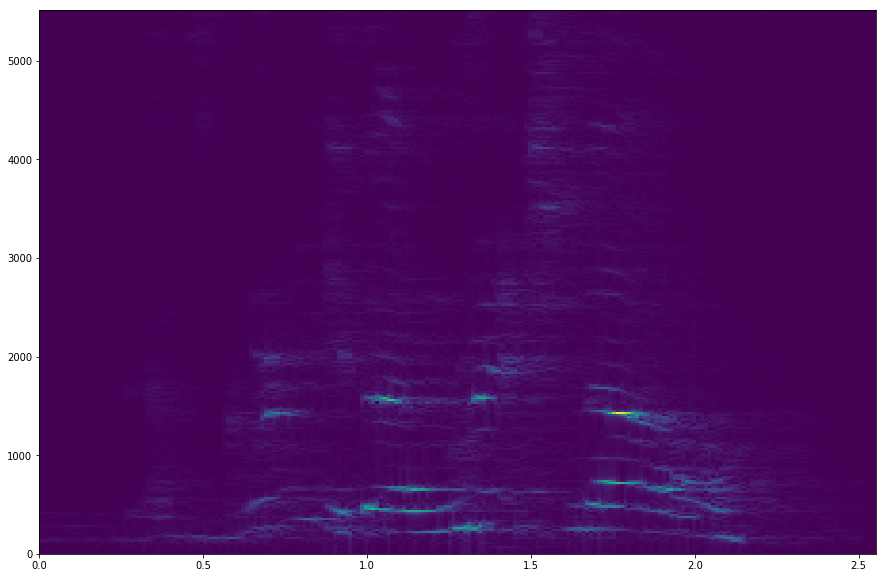

In [26]:
from skimage.util.shape import view_as_windows
# Define the window size

# Define the window step, usually the window step is half or quarter of the window size
window_size_fft = 512
window_step_fft = window_size_fft/4

# Pad the speech sample to make it is divisible by the defined moving window, similar to what we have done in the previous task

# Load speech sample
exerciseData = sio.loadmat('lab2_data.mat')
speech_raw = exerciseData['speech_sample'].reshape(-1)

#print(speech_raw)

# Downsample the speech sample
fs_source = 48000
fs_down = 11025
speech_resampled = signal.resample(speech_raw, np.round(len(speech_raw) * fs_down / fs_source).astype('int'))
print('Resampled length:', len(speech_resampled))

# Calculate the padding length
#padding_length = window_size_fft - window_step_fft % window_size_fft
padding_length = window_size_fft - len(speech_resampled) % window_size_fft
print('padding length:', padding_length)

# Define the padding, and padding values are zeros
padding = np.zeros(int(padding_length))
    
sample_padded = np.concatenate((speech_resampled, padding))
#print(sample_padded)
print('length of padded samples:', len(sample_padded))

# Preallocate memory for the output fft coefficients, a matrix with the size of:
#                                                                  coefficientNum x frameNum

# The coefficientNum can be calculated by:
#       coefficientNum = (np.fft.rfft(sample_padded[:window_size_fft])).shape[0]

coefficientNum = (np.fft.rfft(sample_padded[:window_size_fft])).shape[0]
#print(coefficientNum)
print(np.fft.rfft(sample_padded[:window_size_fft]).shape)
window_num_fft = int(np.ceil(len(sample_padded)/window_step_fft))
print(window_num_fft)


fft_coefficient_matrix = np.zeros((coefficientNum, window_num_fft))
fft_coefficient_matrix = fft_coefficient_matrix.astype(np.complex)
#print fft_coefficient_matrix
#print fft_coefficient_matrix.shape[0]
#print fft_coefficient_matrix.ndim

start = 0

B = view_as_windows(sample_padded, (window_size_fft,), step=int(window_step_fft))


for i in range(B.shape[0]):
    currentSample = B[i,:]
    currentCoefficient = np.fft.rfft(currentSample)
    fft_coefficient_matrix[:,i] = currentCoefficient
    

# Iteratively perform fft for each frame using loop, and paste the fft coefficient into the predefined matrix
#for i in range(len(sample_padded)):
#for i in range(window_num_fft):
    
    #currentSample = sample_padded[i*int(window_step_fft):i*int(window_step_fft)+window_size_fft]
    #currentCoefficient = np.fft.rfft(currentSample)
    #print(i, currentCoefficient.shape, len(currentSample))
    #fft_coefficient_matrix[:,i] = currentCoefficient
    
    # get the sample of current frame
    #if i!=0:
    #    currentSample = (sample_padded[start:int(i)])
        #print currentSample
        #print currentSample.shape
        #print currentSample.ndim

        # calculate the fft coefficient of current frame
     #   currentCoefficient = np.fft.rfft(currentSample)
        #print currentCoefficient
        #print currentCoefficient.shape
        #print currentCoefficient.ndim

        # fill th predefined fft_coefficient_matrix by the calculated coefficient
      #  fft_coefficient_matrix[i] = currentCoefficient
      #  start = int(i)

# Take the magnititude of all fft cofficient (absolute value.)
fft_coefficient_matrix = np.abs(fft_coefficient_matrix)
#print (fft_coefficient_matrix)

# Visulize the calculated cofficient matrix, which is the spectrogram.
# Here we provide the visulization part of the code. But there are some parameter you need to specify:
#
#        window_size_fft
#        signal_frequency
#        sample_length
#        window_num_fft
#        fft_coefficient_matrix

signal_frequency = 11025
freqs = np.fft.rfftfreq(window_size_fft, 1.0/signal_frequency)
#print(freqs)

sample_length = len(sample_padded)
t_fft = np.linspace(0, sample_length/signal_frequency, window_num_fft)
#print(t_fft)
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(15,10))
ax.pcolormesh(t_fft,freqs,fft_coefficient_matrix)
plt.show()

# 2. Multi-modal fusion
In this part, we will compare two types of multi-modal fusion: feature level fusion and match-score level fusion

1. For feature level fusion, we will try direct concatenating the raw data and the feature extracted by PCA
2. Fo the match-score level fusion, we will train two classifiers, one for face data, and one for speech data. Then we fuse the two score and make the decision (Please note that usually we need to perform the normalization before fusing two scores).

In [80]:
# Load data
import sys
sys.path.append('../')

from skimage import io
from skimage import transform
from skimage import color
from skimage import img_as_ubyte
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import sklearn
from sklearn import preprocessing
import scipy.io as sio
mdata = sio.loadmat('lab3_data.mat')
training_data_face_raw = mdata['training_data']
testing_data_face_raw =  mdata['testing_data']

training_data_proso_raw = mdata['training_data_proso']
testing_data_proso_raw = mdata['testing_data_proso']

training_class = mdata['training_class'].reshape(-1)
testing_class = mdata['testing_class'].reshape(-1)


## 2.1 Feature-level fusion
![](Feature_level_fusion.png)




### 2.1.1 Direct concatenation
Direct concatenation coule be the most simple feature fusion method. There is only one thing we should take care of, the scale of different features. Here we perform a simple method to tackle this issue by normalizing the data to zero mean an unit variance. 

In [81]:
# Direct Concatenation

# Get the mean and variance of the training_data_face_raw and training_data_proso_raw
# Please notice that we have to use the mean and variance of the training data to normalize our testing data,
# since usually we do not have much information on our testing data. An extreme case is that we only have one testing sample, 
# then the mean and variance is meanless in this case. 
mean_face_raw = preprocessing.StandardScaler().fit(training_data_face_raw).mean_
#print(mean_face_raw)
std_face_raw = preprocessing.StandardScaler().fit(training_data_face_raw).scale_
#print(std_face_raw)

mean_proso_raw = preprocessing.StandardScaler().fit(training_data_proso_raw).mean_
std_proso_raw = preprocessing.StandardScaler().fit(training_data_proso_raw).scale_

# Normalize the traing data and testing to zero mean and unit variance, using respective mean and variance

training_data_face_raw_normalized = preprocessing.StandardScaler().fit(training_data_face_raw).transform(training_data_face_raw)
training_data_proso_raw_normalized = preprocessing.StandardScaler().fit(training_data_proso_raw).transform(training_data_proso_raw)


testing_data_face_raw_normalized = preprocessing.StandardScaler().fit(testing_data_face_raw).transform(testing_data_face_raw)  
testing_data_proso_raw_normalized = preprocessing.StandardScaler().fit(testing_data_proso_raw).transform(testing_data_proso_raw)

# Concatate two source of features.
training_data_concatenated_raw = np.concatenate((training_data_face_raw_normalized, training_data_proso_raw_normalized), axis=1)
testing_data_concatenated_raw = np.concatenate((testing_data_face_raw_normalized, testing_data_proso_raw_normalized), axis=1)


# Evaluate the three sets of features, namely the face data, proso data, and concatenated data.
from sklearn import svm
classifier_proso_raw = svm.SVC(kernel = 'linear', cache_size = 200)
classifier_face_raw = svm.SVC(kernel = 'linear', cache_size = 200)
classifier_concatenated_raw = svm.SVC(kernel = 'linear', cache_size = 200)

# Fit each classifier with corresponding feature
# Please be aware that even we name the classifier as classifier_xxx_raw, we should use normalized data to fit it.
classifier_face_raw.fit(training_data_face_raw_normalized, training_class )
classifier_proso_raw.fit(training_data_proso_raw_normalized, training_class)
classifier_concatenated_raw.fit(training_data_concatenated_raw, training_class)

# Predict the testing data and evaluate the accuracies.
pred_face_raw = classifier_face_raw.predict(testing_data_face_raw_normalized)
pred_proso_raw = classifier_proso_raw.predict(testing_data_proso_raw_normalized)
pred_concatenated_raw = classifier_concatenated_raw.predict(testing_data_concatenated_raw)

print sum(pred_proso_raw == testing_class)
print sum(pred_face_raw == testing_class)
print sum(pred_concatenated_raw == testing_class)

42
47
46


Question: Have we get any significant improvement after the direct concatenation data fusion?

### 2.1.2 Subspace learning using principle component analysis (pca)

Extract the subspace for facial expression feature and audio features using principal component analysis through using __[`sklearn.decomposition.PCA()`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)__ function.
ReducedDim is the dimensionality of the reduced subspace.
1. Set ReducedDim to 20 and 15 for facial expression feature and audio feature, respectively.
2. Extract the subspace for facial expression feature and audio features using principal component analysis.
3. Fuse the two sets of new features after dimension reduction again by direct concatenation
4. Evaluate the three sets of features: face and proso feature after dimension reduction, and the fused feature.


In [82]:
# Perform dimension reduction and extract the principle component
from sklearn.decomposition import PCA 

# Define the number of principle component for each feature.
reducedDim_v =20
reducedDim_a =15

# Perform PCA on the face data, you can use the training_data_face_raw here for fitting the PCA
# Please set the whiten argument of PCA() as True since it will perform the zero score normalization for you.
pca_v = PCA(reducedDim_v, whiten = True)
pca_v.fit(training_data_face_raw)
training_data_face_pca = pca_v.transform(training_data_face_raw)
testing_data_face_pca = pca_v.transform(testing_data_face_raw)

# Perform PCA on the face data, you can use the training_data_proso_raw here for fitting the PCA
pca_a=PCA(reducedDim_a, whiten = True)
pca_a.fit(training_data_proso_raw)
training_data_proso_pca = pca_a.transform(training_data_proso_raw)
testing_data_proso_pca = pca_a.transform(testing_data_proso_raw)


# Fuse the two features after dimension reduction by direct concatenation
training_data_concatenated_pca = np.concatenate((training_data_face_pca, training_data_proso_pca), axis=1)
testing_data_concatenated_pca = np.concatenate((testing_data_face_pca, testing_data_proso_pca), axis=1)

# Evaluate the three features in the way you have done in task 2.1.1
classifier_face_pca = svm.SVC(kernel = 'linear', cache_size = 200)
classifier_proso_pca = svm.SVC(kernel = 'linear', cache_size = 200)
classifier_concatenated_pca = svm.SVC(kernel = 'linear', cache_size = 200)

classifier_face_pca.fit(training_data_face_pca, training_class)
classifier_proso_pca.fit(training_data_proso_pca, training_class)
classifier_concatenated_pca.fit(training_data_concatenated_pca,training_class)

pred_face_pca = classifier_face_pca.predict(testing_data_face_pca)
pred_proso_pca = classifier_proso_pca.predict(testing_data_proso_pca)
pred_concatanated_pca = classifier_concatenated_pca.predict(testing_data_concatenated_pca)

print sum(pred_face_pca == testing_class)
print sum(pred_proso_pca == testing_class)
print sum(pred_concatanated_pca == testing_class)


42
43
49


Question: Is this type of feature fusion improves the performance?

## 2.2 Match-score level fusion

![](Match-score_level_fusion.png)



### 2.2.1 Fuse the match-score acquired from the normalized raw feature.
Here you will reuse the classifier **classifier_face_raw** and **classifier_proso_raw** you have trained in 2.1.1. 
Procedures:

1. Call the __[`sklearn.svm.SVC.decision_function()`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.decision_function)__ function to return the match score for each sample. 
2. Calculate the match-score for **testing_data_face_raw_normalized** and  **testing_data_proso_raw_normalized** data by **classifier_face_raw** and **classifier_proso_raw** respectively.
3. Fuse the two types of scores by simple adding operation (please be aware that the two scores are in different scale, you have to do a normalization. Here you can just simply divide the score by the variance of the score calculated from training data. Please see the code example below for more details)
4. Classify samples using the fuesd score and see its improvements

In [83]:
from sklearn import preprocessing

# Calculate the match-score of the training_data_face_raw_normalized 
#                              and training_data_proso_raw_normalized
# using the trained classifier

score_face_raw_train = classifier_face_raw.decision_function(training_data_face_raw_normalized)
score_proso_raw_train =classifier_proso_raw.decision_function(training_data_proso_raw_normalized)

# Calculate the match-score for the testing data
score_face_raw_test = classifier_face_raw.decision_function(testing_data_face_raw_normalized)
score_proso_raw_test = classifier_proso_raw.decision_function(testing_data_proso_raw_normalized)

# Normalizing the match-score
score_face_raw_test_normalize = (score_face_raw_test)/np.std(score_face_raw_train)
score_proso_raw_test_normalize =(score_proso_raw_test)/np.std(score_proso_raw_train)

score_fused_raw_test = score_face_raw_test_normalize + score_proso_raw_test_normalize

# reshaping samples to 2D array
score_face_raw_train = score_face_raw_train.reshape(-1,1)
score_proso_raw_train = score_proso_raw_train.reshape(-1,1)
score_fused_raw_test = score_fused_raw_test.reshape(-1,1)

# Classifying samples by match-scores. and print the accuracies
# If the match-score is smaller than 0, the sample belongs to class 1, otherwise belongs to class 2
from sklearn.metrics import accuracy_score
classifier_score_face_raw = svm.SVC(kernel = 'linear', cache_size = 200)
classifier_score_proso_raw = svm.SVC(kernel = 'linear', cache_size = 200)

classifier_score_face_raw.fit(score_face_raw_train,training_class)
classifier_score_proso_raw.fit(score_proso_raw_train,training_class)

pred_score_face_raw = classifier_score_face_raw.predict(score_fused_raw_test)
pred_score_proso_raw = classifier_score_proso_raw.predict(score_fused_raw_test)

print sum(pred_score_face_raw == testing_class)
print sum(pred_score_proso_raw == testing_class)

print(accuracy_score(pred_score_face_raw,testing_class))
print(accuracy_score(pred_score_proso_raw,testing_class))


47
47
0.94
0.94


Question: Why we do not substract the mean o

### 2.2.2 Fuse the match-score acquired from the PCA feature.
Here you will perform a similar match-score level fusion task like what you have done in 2.2.1. But the data and classifier are those PCA related ones in 2.1.2.



In [84]:
# Calculate the match-score of the training_data_face_pca and training_data_proso_pca

# Match score level fusion
# Since there are plenty to tips in 2.2.1 so we leave this part blank for you to implement.
# using the trained classifier

score_face_raw_train = classifier_face_pca.decision_function(training_data_face_pca)
score_proso_raw_train =classifier_proso_pca.decision_function(training_data_proso_pca)

# Calculate the match-score for the testing data
score_face_raw_test = classifier_face_pca.decision_function(testing_data_face_pca)
score_proso_raw_test = classifier_proso_pca.decision_function(testing_data_proso_pca)

# Normalizing the match-score
score_face_raw_test_normalize = (score_face_raw_test)/np.std(score_face_raw_train)
score_proso_raw_test_normalize =(score_proso_raw_test)/np.std(score_proso_raw_train)

score_fused_raw_test = score_face_raw_test_normalize + score_proso_raw_test_normalize

# reshaping samples to 2D array
score_face_raw_train = score_face_raw_train.reshape(-1,1)
score_proso_raw_train = score_proso_raw_train.reshape(-1,1)
score_fused_raw_test = score_fused_raw_test.reshape(-1,1)

# Classifying samples by match-scores. and print the accuracies
# If the match-score is smaller than 0, the sample belongs to class 1, otherwise belongs to class 2
from sklearn.metrics import accuracy_score
classifier_score_face_raw = svm.SVC(kernel = 'linear', cache_size = 200)
classifier_score_proso_raw = svm.SVC(kernel = 'linear', cache_size = 200)

classifier_score_face_raw.fit(score_face_raw_train,training_class)
classifier_score_proso_raw.fit(score_proso_raw_train,training_class)

pred_score_face_raw = classifier_score_face_raw.predict(score_fused_raw_test)
pred_score_proso_raw = classifier_score_proso_raw.predict(score_fused_raw_test)

print sum(pred_score_face_raw == testing_class)
print sum(pred_score_proso_raw == testing_class)

print(accuracy_score(pred_score_face_raw,testing_class))
print(accuracy_score(pred_score_proso_raw,testing_class))

48
48
0.96
0.96
